#                                                            Covering Covid-19 : A Wholistic Analysis

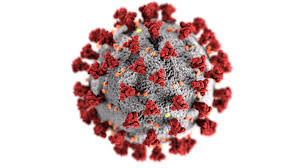


## Group 95

### > <span style="color:#000080;">  Abdullah Khan | Student ID: 45542147 </span> 

### > <span style="color:#000080;">  Durga Alagirisamy | Student ID: 45572453 </span>

### > <span style="color:#000080;">  Nafis Ahmed Bitw | Student ID: 45521026</span>

### > <span style="color:#000080;">  Namrata Rajiv Katti | Student ID: 46152717</span>
 

## Introduction

<span style="color:#000080;"> COVID-19 (Coronavirus) is an infectious viral disease that has spread all over the world. With over 30 Million cases worldwide and almost a million deaths, it has evolved into a modern pandemic. It has sent shockwaves throughout industries and businesses, economies into recession and elevating unemployment rates. Data analysis and exploration would be more useful if we could have better prediction of what affects the spread and deaths.
    For our project, we have taken a step in exploring the trends and impacts of COVID and lockdowns. More analysis has been done in regards to the Australian international travel dataset as well.  </span>

## Problem Statement and Goals

<span style="color:#000080;"> Does lockdown had an impact on the covid cases and deaths? Can we predict the number of death cases in COVID19 using the country population, area and few other variables? </span>


# Importing Libraries

In [1]:
# General libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import math
%matplotlib notebook
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# To avoid warnings
import warnings
warnings.filterwarnings("ignore")



## Importing the cleaned Dataframes from <span style="color:#892528;"> Data_Cleaning </span>

In [2]:
from dataframes import cov, df1, df2, df3, df4, df5, ArrDepdf

## Our Dataframes


Dataframes | Description
------------ | -------------
**cov** | Dates, Cases, Deaths, Country Code, Region, Country
**df1** | Country Code, Cumulative cases, cumulative deaths
**df2** | Country Code, Region, Population, Area, Pop.Density...GDP
**df3** | Combination of df1 and df2, indexed by country code.
**df4** | Australian International arrivals from other countries. 
**df5** | Australian International departure to other countries.
**ArrDepdf** | Arrival/Departure data into and out of Australia. Countries show nationalities of travellers.

## Data Exploration and Visualisation

## <span style="color:#000080;"> First few days of COVID 19 visualized in Animated Line graphs </span>

<IPython.core.display.Javascript object>


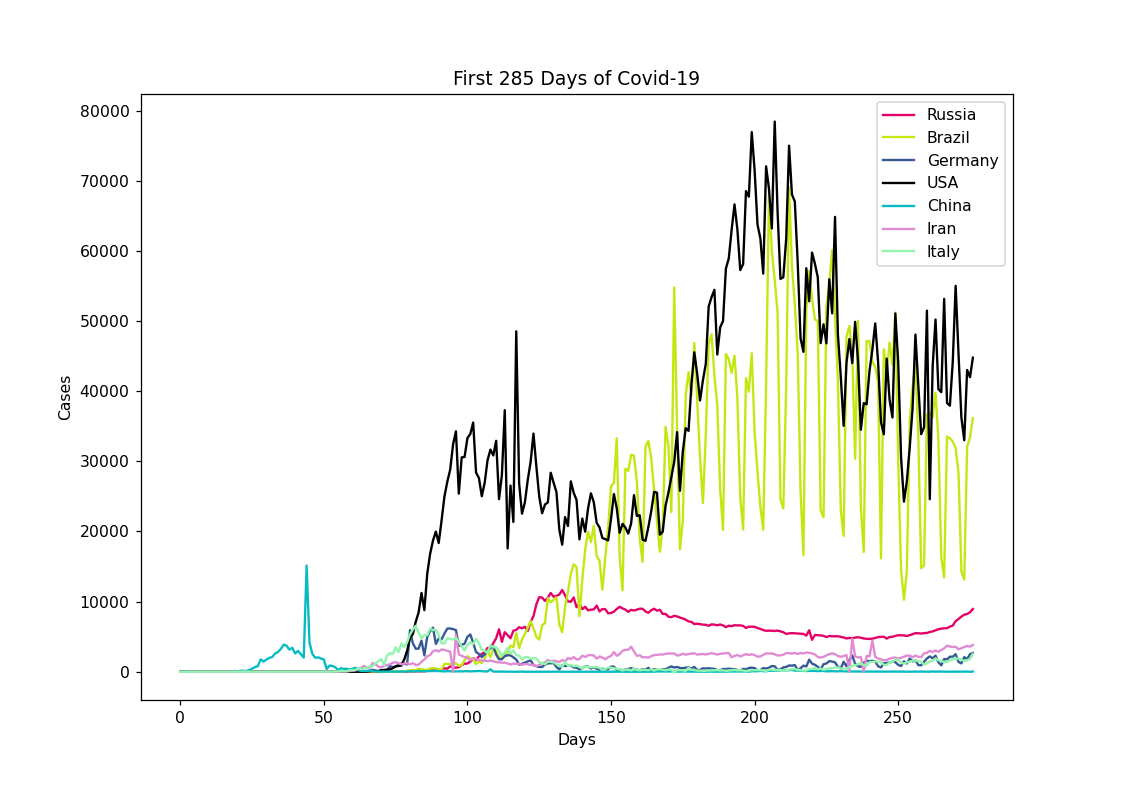

In [3]:
rd = cov
dfContCode = pd.DataFrame({
    "Code" : rd["Code"],
    "Continent" : rd["continentExp"]
}, index = rd.index)
rdRus = rd[rd["countriesAndTerritories"] == "Russia"]
rdBr = rd[rd["countriesAndTerritories"] == "Brazil"]
rdGer = rd[rd["countriesAndTerritories"] == "Germany"]
rdItaly = rd[rd["countriesAndTerritories"] == "Italy"]
rdUS = rd[rd["countriesAndTerritories"] == "United_States_of_America"]
rdChina = rd[rd["countriesAndTerritories"] == "China"]
rdIran = rd[rd["countriesAndTerritories"] == "Iran"]
count = {
    "Russia" : [x for x in rdRus["cases"]],
    "Brazil" : [x for x in rdBr["cases"]],
    "Germany" : [x for x in rdGer["cases"]],
    "Italy" : [x for x in rdItaly["cases"]],
    "USA" : [x for x in rdUS["cases"]],
    "China" : [x for x in rdChina["cases"]],
    "Iran" :[x for x in rdIran["cases"]]
}

cbc = pd.DataFrame(data = count)
cbc = cbc.set_index(rdRus.index)
cbc = cbc.reindex(index=cbc.index[::-1])
x = [x for x in range(0, len(cbc.index))]
fig, ax = plt.subplots(figsize = (10, 7))
line1, = ax.plot(x, cbc["Russia"], label='Russia', color = "#E40066")
line2, = ax.plot(x, cbc["Brazil"], label='Brazil', color = "#C2E812")
line3, = ax.plot(x, cbc["Germany"], label='Germany', color = "#345995")
line4, = ax.plot(x, cbc["USA"], label='USA', color = "black")
line5, = ax.plot(x, cbc["China"], label = "China", color = "#06BCC1")
line6, = ax.plot(x, cbc["Iran"], label = "Iran", color = "#E18AD4")
line7, = ax.plot(x, cbc["Italy"], label='Italy', color = "#91F5AD")
def update(num):
    line1.set_data(x[:num], cbc["Russia"][:num])
    line2.set_data(x[:num], cbc["Brazil"][:num])
    line3.set_data(x[:num], cbc["Germany"][:num])
    line4.set_data(x[:num], cbc["USA"][:num])
    line5.set_data(x[:num], cbc["China"][:num])
    line6.set_data(x[:num], cbc["Iran"][:num])
    line7.set_data(x[:num], cbc["Italy"][:num])
     
plt.ylabel('Cases')
plt.xlabel('Days')
plt.legend()
plt.title("First 285 Days of Covid-19")
ani = animation.FuncAnimation(fig, update, len(x), interval=3, repeat = False, blit=True)

<span style="color:#000080;"> In the first two months of the outbreak, China was impacted the most. The cases continued spreading throughout the world. As apparent in the US and Brazil line animations, the day by day case reports were highest for these two countries.

## <span style="color:#000080;"> Pie Chart- World wide case distribution </span>

In [4]:
# Distribution of Cases
pieDf = df3
total = pieDf["cases"].sum()
pieDf["Percentage Cases"] = np.ceil(pieDf["cases"]/total * 100)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = pieDf.sort_values('cases', ascending = False)
sizes_x = sizes["cases"]
toptenCases = [x for x in sizes["cases"][0:10]]
toptenDeaths = [x for x in sizes["deaths"][0:10]]
restcntCases = sizes["cases"][10:]
restcntDeaths = sizes["deaths"][10:]


labels = [x for x in sizes["Country"][0:10]]
labels.append("Rest of the World")
x = restcntCases.sum()
y = restcntDeaths.sum()
toptenCases.append(x)
toptenDeaths.append(y)
fig = px.pie(values = toptenCases, names = labels, hole=.3, title = "Worldwide Case Distribution")
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

<span style="color:#000080;"> This piechart illustrates the case distribution for COVID-19. Some of the top countries are shown.

## <span style="color:#000080;"> Geomap visualisation of COVID cases and deaths </span>

In [5]:
fig = px.choropleth(df3, locations=df3.index,
                    color="cases", # Number of cases is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.matter)
fig.update_layout( title_text = 'COVID cases distribution')
fig.show()

<span style="color:#000080;"> This plot represent the spatial variations of the number of COVID cases in every country. It can be see that the cases count is high in USA, India and Brazil. In all other countries, the number of cases is less than 2 million. </span>

In [6]:
fig = px.choropleth(df3, locations=df3.index,
                    color="deaths", # Number of deaths is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout( title_text = 'COVID deaths distribution')
fig.show()

<span style="color:#000080;"> This plot represent the spatial variations of the number of COVID deaths in every country. It can be observed that inaccordance with the cases graph from above, the number of COVID deaths in USA and Brazil is quite high. Thought the number cases were high in India, the number of deaths is almost quite similar as in Mexico. But it would be a better visualization if done against the population vector.</span>

In [7]:
# COVIDdeaths_per_Capita is Number of deaths per population in a country
df3["COVIDdeaths_per_Capita"]= (df3['deaths']/df3['Population'])*100

# Geomap for COVIDdeaths_per_Capita
fig = px.choropleth(df3, locations=df3.index,
                    color="COVIDdeaths_per_Capita", # COVIDdeaths_per_Capita is a column of gapminder
                    hover_name="Country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Sunsetdark)
fig.show()

<span style="color:#000080;"> The countries inside the region of North America and South America and few regions of Europe shows more recorded deaths per capita.  </span>

## <span style="color:#000080;"> Heatmap along with Correlation matrix </span>

<IPython.core.display.Javascript object>


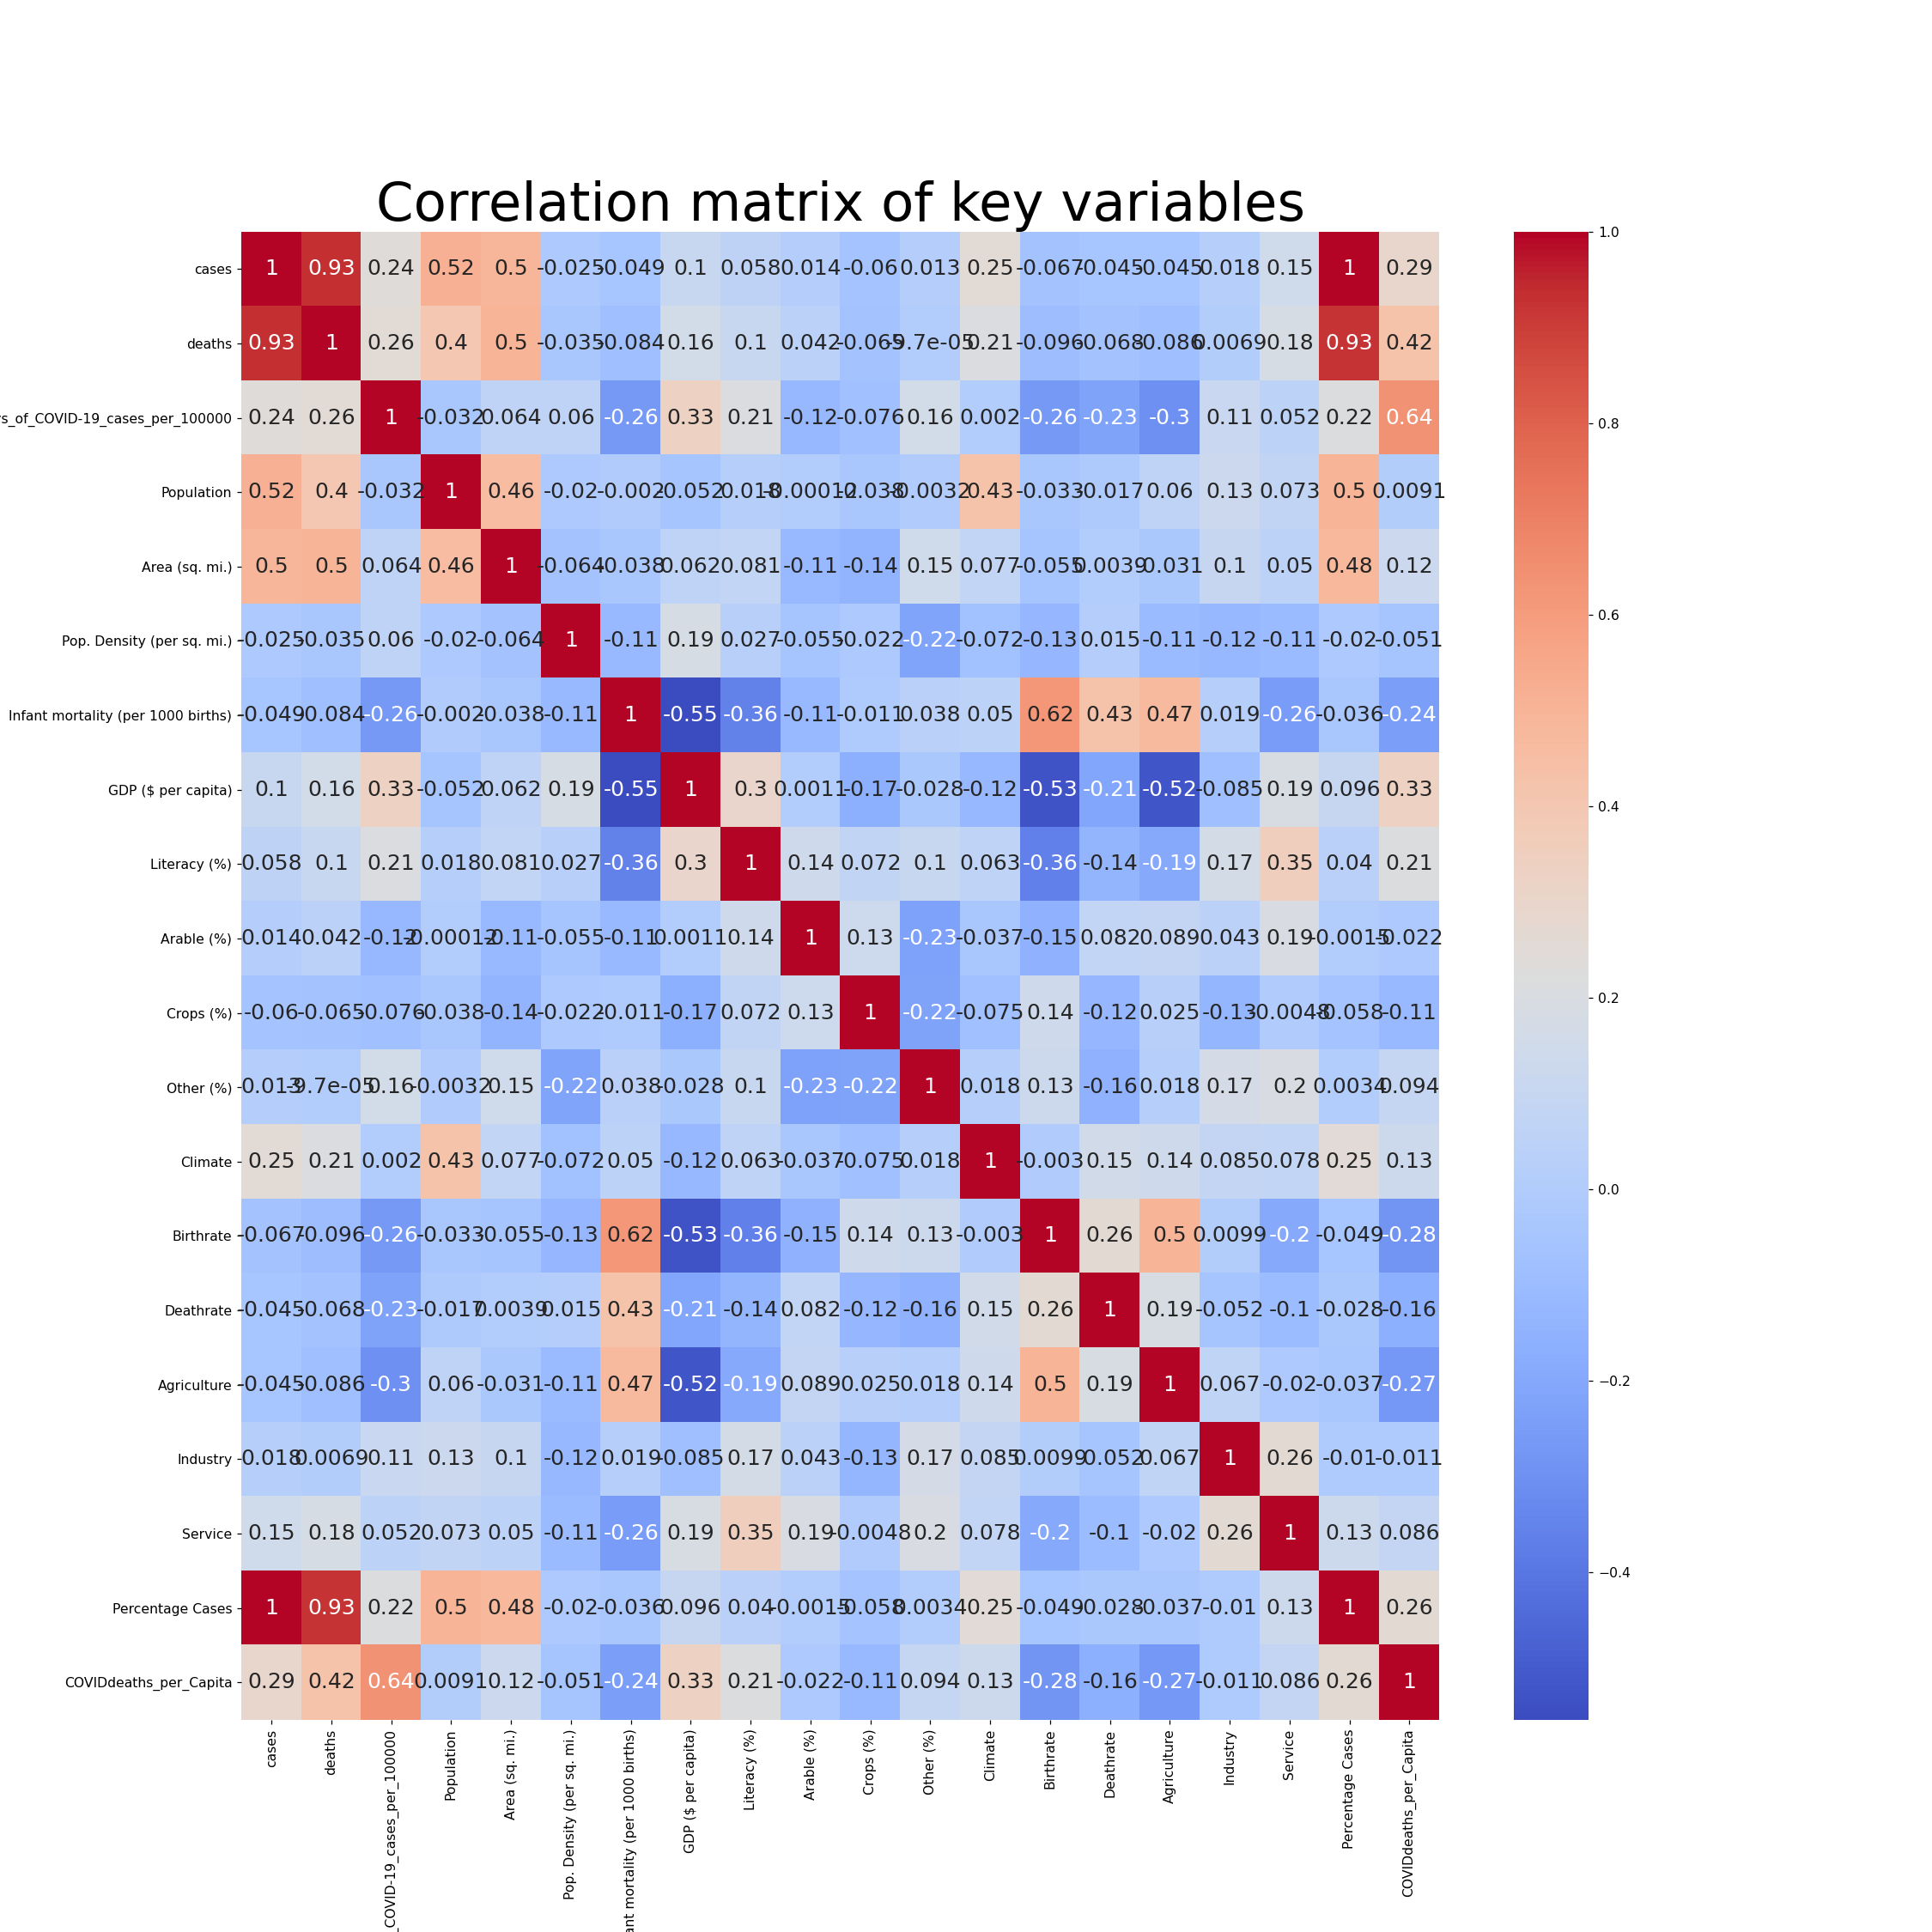

In [8]:
param = df3.columns
corr = df3[param]
plt.figure(figsize=(20, 20))
plt.title('Correlation matrix of key variables', size=40)
sns.heatmap(corr.corr(), cmap = 'coolwarm', annot = True, annot_kws = {"size":16})
plt.savefig("Analaus4")

<span style="color:#000080;">
    From the heatmap, it can be seen that most columns don’t correlate to deaths. As show by the intensity of the redness, Number of cases are the strongest correlations in the heatmap, followed by the population sizes of the respective countries where the deaths occurred due to Coronavirus. Also, very interestingly there’s some correlation with the area of the countries and number of covid related deaths. 
    The heat map along with correlation matrix portrays more accurately with exact numbers of the correlations.
    </span>

<IPython.core.display.Javascript object>


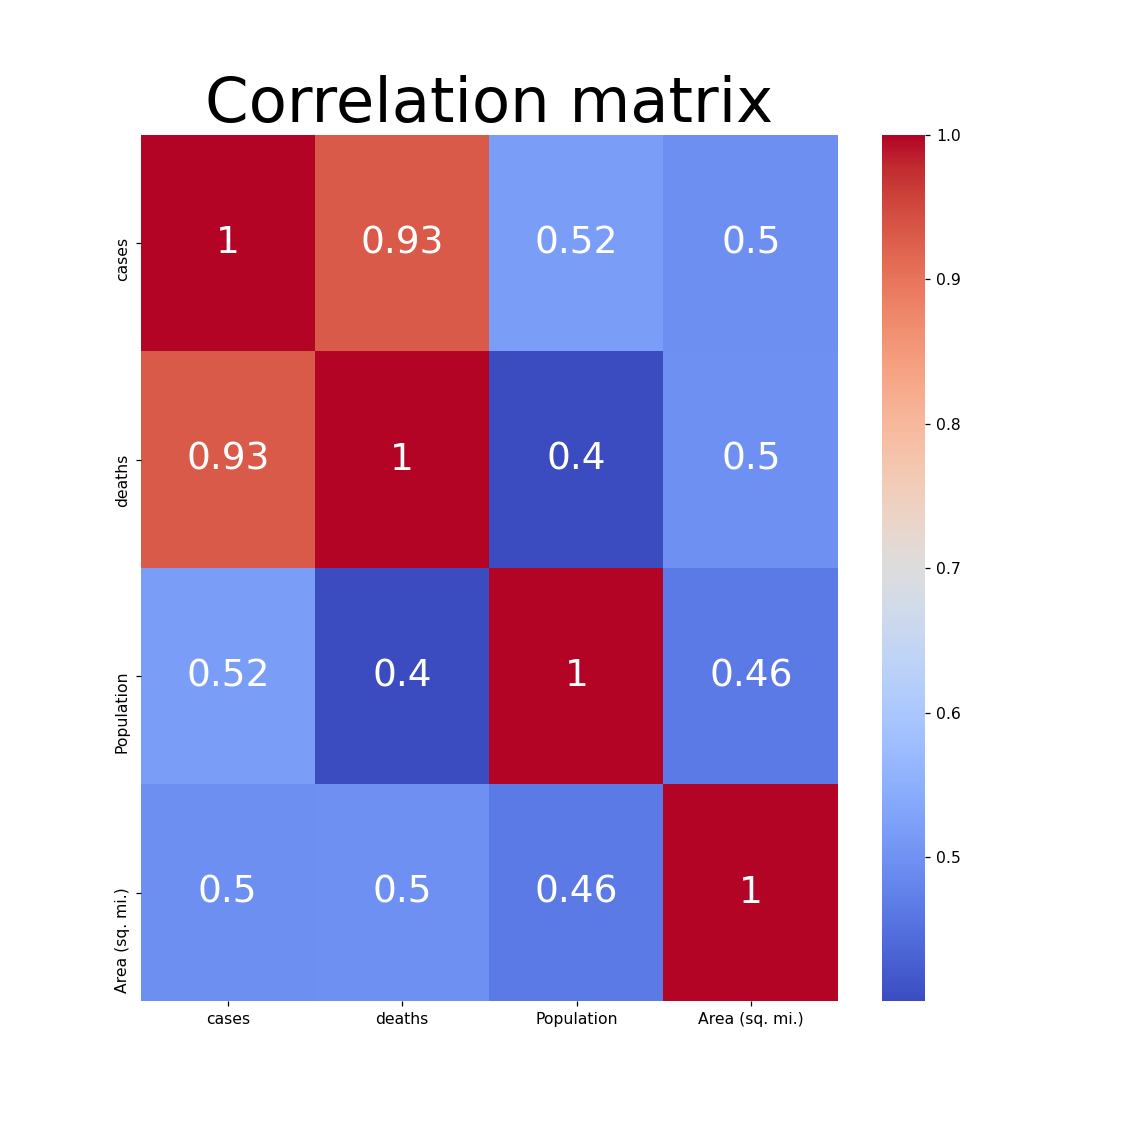

In [13]:
param = ['cases', 'deaths', 'Population', 'Area (sq. mi.)']
corr = df3[param]

plt.figure(figsize=(10, 10))
plt.title('Correlation matrix', size=40)

sns.heatmap(corr.corr(), cmap = 'coolwarm', annot = True, annot_kws = {"size":24})
plt.savefig("heatmap")

<span style="color:#000080;">
This heatmap is a more in focus look at the features that have the highest correlations with death
     </span>

 ## <span style="color:#000080;"> Pair plot of few key numerical variables </span>
     

<IPython.core.display.Javascript object>


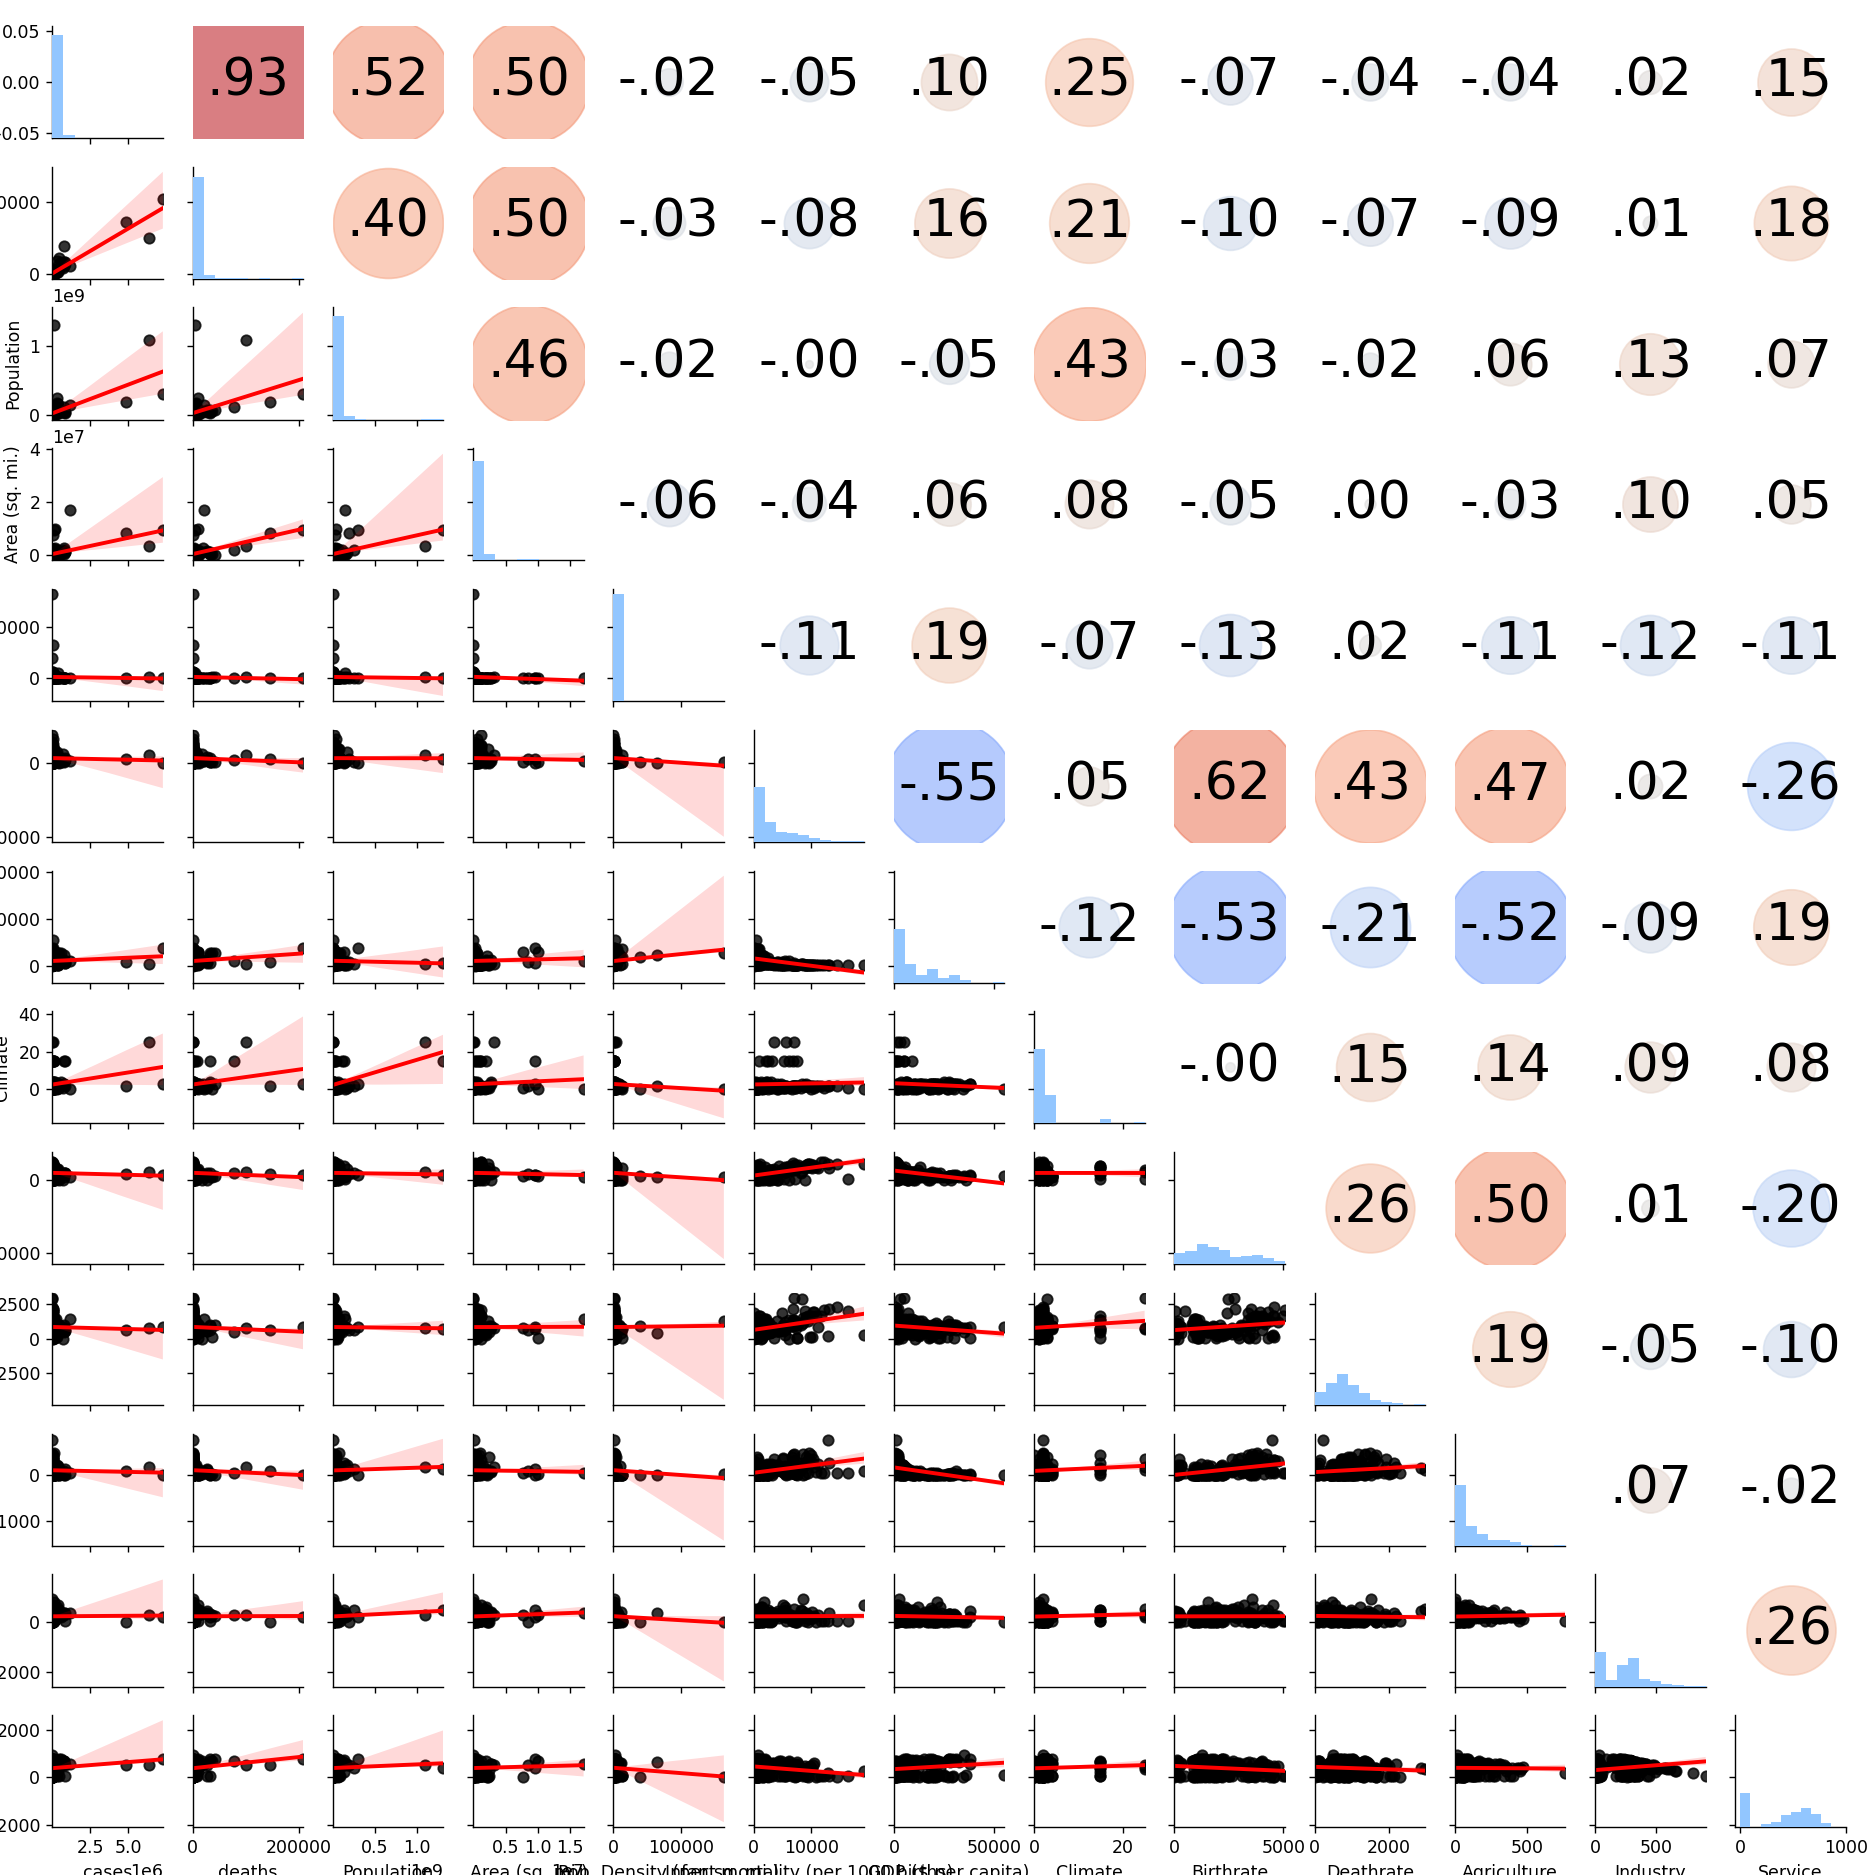

In [10]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = 30
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)
    
params = ['cases','deaths','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]


g = sns.PairGrid(df3[params])
g.fig.set_size_inches(15,15)
g = g.map_lower(sns.regplot,line_kws={"color": "red"}, scatter_kws={'color':'black'})
g = g.map_diag(plt.hist)
g = g.map_upper(corrdot)

<span style="color:#000080;"> The pairplot shows a great correlation between deaths and cases, weak correlations between deaths with cases, area, population. It also plots weak correlation between area and population, birth rate and death rate, agricultural economies and birth rates, population and climates </span>

 ## <span style="color:#000080;"> Scatterplot of cases against deaths in accordance with the region </span>

<IPython.core.display.Javascript object>


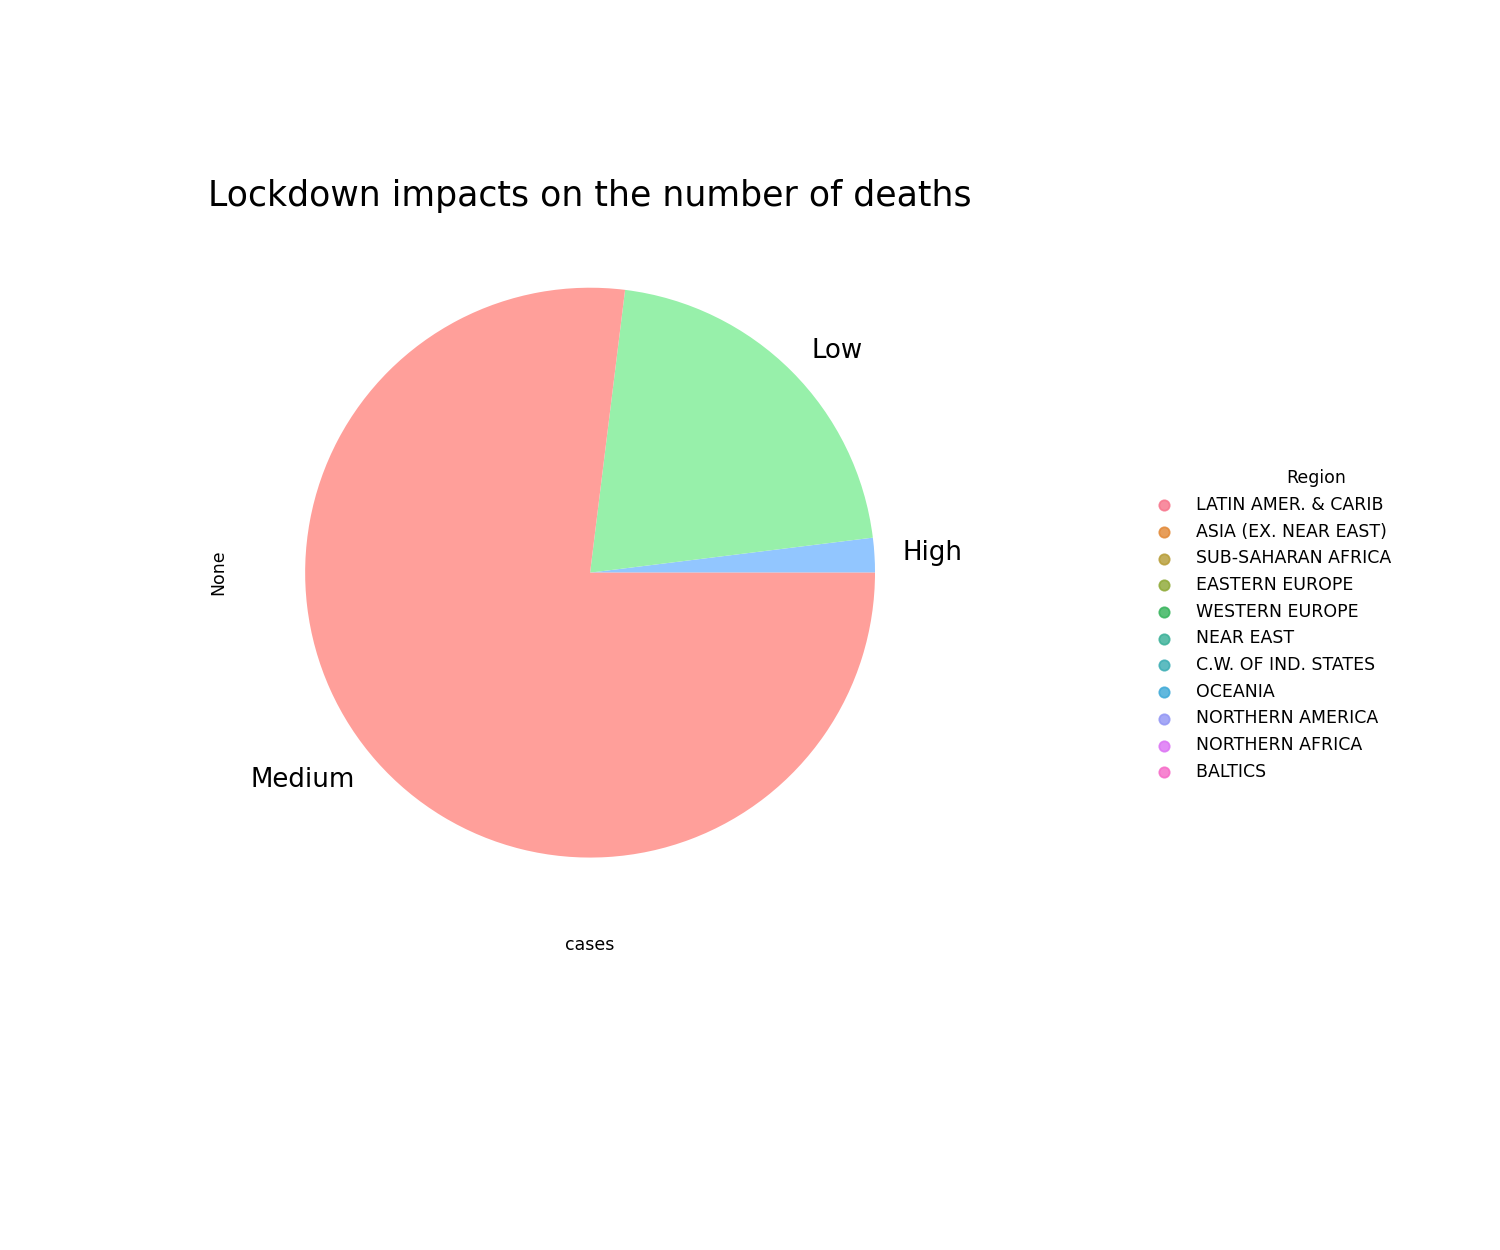

In [11]:
sns.lmplot(x='cases', y='deaths', data=df3,
           fit_reg=False, # No regression line
           hue='Region')   # Color by Region

<span style="color:#000080;"> As described above in the Geomap, the scatterplot shows that the region of Northern america, Latin America and Caribbean and Asia has more number of recorded deaths. </span>

## Let us now see how the lockdown had an impact in COVID dataset

In [14]:
# We will now use the dataset with dates and recorded cases 
cov.head()

cases  deaths countriesAndTerritories geoId Code  popData2019  \
dates                                                                       
2020-10-02     17       0             Afghanistan    AF  AFG   38041757.0   
2020-10-01     14       0             Afghanistan    AF  AFG   38041757.0   
2020-09-30     15       2             Afghanistan    AF  AFG   38041757.0   
2020-09-29     12       3             Afghanistan    AF  AFG   38041757.0   
2020-09-28      0       0             Afghanistan    AF  AFG   38041757.0   

           continentExp  \
dates                     
2020-10-02         Asia   
2020-10-01         Asia   
2020-09-30         Asia   
2020-09-29         Asia   
2020-09-28         Asia   

            Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
dates                                                                   
2020-10-02                                           1.085649           
2020-10-01                                           1.040961           
2020-09-30                                           1.048847           
2020-09-29                                           1.114565           
2020-09-28                                           1.343261

In [15]:
cov['date']= cov.index
cov['month']= pd.DatetimeIndex(cov['date']).month_name()

# Grouping data in accordance with month and Country code
covCo = cov.groupby(['month', 'Code']).sum()
covCo = covCo.drop(columns= ["popData2019"])
covCo.head()

cases  deaths  \
month Code                  
April ABW      50       2   
      AFG    1808      56   
      AGO      20       0   
      AIA       1       0   
      ALB     543      19   

            Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
month Code                                                              
April ABW                                          901.138181           
      AFG                                           44.990036           
      AGO                                            0.886087           
      AIA                                           67.240452           
      ALB                                          253.106891

#### <span style="color:#000080;"> On average, Lockdown in many countries had started in the month of April. Therefore we could compare the data collected in each country for April and compare it with Last month's data. </span>

In [16]:
# COVID dataset from April
Lockdown= covCo.loc["April"]
Lockdown_start= Lockdown.rename(columns={'cases': 'A_cases', 'deaths': 'A_deaths', 
                                         'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'A_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' })

In [17]:
# COVID dataset from October
Lockdown= covCo.loc["October"]
Lockdown_aftermath= Lockdown.rename(columns={'cases': 'O_cases', 'deaths': 'O_deaths', 
                                         'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'O_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' })

In [18]:
# Combining the above dataset gives the Lockdown_data
Lockdown_data= pd.concat([Lockdown_start, Lockdown_aftermath], axis=1)

# To get the impacts of Lockdown, we need to compare the cases from April to October. 
Lockdown_data['cases_difference']= Lockdown_data['A_cases']- Lockdown_data['O_cases']
Lockdown_data.head()

A_cases  A_deaths  \
ABW     50.0       2.0   
AFG   1808.0      56.0   
AGO     20.0       0.0   
AIA      1.0       0.0   
ALB    543.0      19.0   

     A_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  O_cases  \
ABW                                         901.138181                  64   
AFG                                          44.990036                  31   
AGO                                           0.886087                  67   
AIA                                          67.240452                   0   
ALB                                         253.106891                 288   

     O_deaths  O_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
ABW         1                                        1176.747249              
AFG         0                                           2.126610              
AGO         4                                           8.251297              
AIA         0                                           0.000000              
ALB         4                                         128.946520              

     cases_difference  
ABW             -14.0  
AFG            1777.0  
AGO             -47.0  
AIA               1.0  
ALB             255.0

In [26]:
# We can now introduce a categorical variable to describe the impacts in a more understandable manner
# Therefore we get the range for differentiation from the 'cases_difference' column
Lockdown_data.sort_values(by= ['cases_difference'])

A_cases  A_deaths  \
IND   31799.0    1042.0   
ARG    3306.0     190.0   
IRQ    1373.0      46.0   
ISR   11361.0     198.0   
COL    5413.0     264.0   
..        ...       ...   
GBR  137469.0   23999.0   
USA  875289.0   57796.0   
COM       NaN       NaN   
LSO       NaN       NaN   
TJK       NaN       NaN   

     A_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  O_cases  \
IND                                          22.571648              168305   
ARG                                          92.019604               28393   
IRQ                                          47.809974                9184   
ISR                                        2045.737403               18845   
COL                                         117.397008               11297   
..                                                 ...                 ...   
GBR                                        2596.933232               14022   
USA                                        3380.417792               86753   
COM                                                NaN                   5   
LSO                                                NaN                  63   
TJK                                                NaN                  85   

     O_deaths  O_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
IND      2276                                         173.718615              
ARG      3769                                         780.812259              
IRQ       109                                         305.295457              
ISR        94                                        1821.765522              
COL       368                                         366.901159              
..        ...                                                ...              
GBR       130                                         230.481105              
USA      1810                                         366.343520              
COM         0                                           4.583431              
LSO         3                                          27.290689              
TJK         2                                          12.820481              

     cases_difference  
IND         -136506.0  
ARG          -25087.0  
IRQ           -7811.0  
ISR           -7484.0  
COL           -5884.0  
..                ...  
GBR          123447.0  
USA          788536.0  
COM               NaN  
LSO               NaN  
TJK               NaN  

[209 rows x 7 columns]

In [27]:
#clean the data by dropping NaN values
Lockdown_data.isna().sum()

A_cases                                                         3
A_deaths                                                        3
A_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    3
O_cases                                                         0
O_deaths                                                        0
O_Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    0
cases_difference                                                3
dtype: int64

### <span style="color:#000080;"> The Lockdown impacts can now be summarised as 'High', 'Medium' and 'Low' depending on the influence it had on following months. </span>

In [29]:
# A new column called 'Impacts' has been created with many conditions, 
def label_race (row): 
    #The case difference between April and October below 0, is assumed to have LOW lockdown impact
    if (row['cases_difference'] >= -14051) & (row['cases_difference'] <= 0) :
        return 'Low'
    
    #The case difference between April and October in the range of 1 to Hundred thousand, 
    # is assumed to have MEDIUM lockdown impact
    if (row['cases_difference'] >= 1) & (row['cases_difference'] <= 100000) :
        return 'Medium'
    
    # Anything above Hundred thousand, is assumed to have HIGH lockdown impact
    if (row['cases_difference'] >= 100001) & (row['cases_difference'] <= 800187) :
        return 'High'

# Applying the conditions with Lambda function
Lockdown_data['Impacts']= Lockdown_data.apply (lambda row: label_race(row), axis=1)

In [30]:
# The categorical variable from the Lockdown_data is extracted and compared with the intial dataframe df3.
Lockdown_impacts= Lockdown_data['Impacts']
df3_with_impacts= pd.concat([df3, Lockdown_impacts], axis=1, sort=True)
df3_with_impacts.head()

cases  deaths  \
ABW   3998.0    27.0   
AFG  39285.0  1458.0   
AGO   4972.0   183.0   
AIA      3.0     0.0   
ALB  13806.0   388.0   

     Cumulative_number_for_14_days_of_COVID-19_cases_per_100000      Country  \
ABW                                       48934.248896                 Aruba   
AFG                                        1441.242580           Afghanistan   
AGO                                         194.681596                Angola   
AIA                                          67.240452              Anguilla   
ALB                                        6321.348981               Albania   

                                  Region  Population  Area (sq. mi.)  \
ABW              LATIN AMER. & CARIB         71891.0           193.0   
AFG        ASIA (EX. NEAR EAST)           31056997.0        647500.0   
AGO  SUB-SAHARAN AFRICA                   12127071.0       1246700.0   
AIA              LATIN AMER. & CARIB         13477.0           102.0   
ALB  EASTERN EUROPE                        3581655.0         28748.0   

     Pop. Density (per sq. mi.)  Infant mortality (per 1000 births)  \
ABW                      3725.0                               589.0   
AFG                       480.0                             16307.0   
AGO                        97.0                             19119.0   
AIA                      1321.0                              2103.0   
ALB                      1246.0                              2152.0   

     GDP ($ per capita)  ...  Climate  Birthrate  Deathrate  Agriculture  \
ABW             28000.0  ...      2.0     1103.0      668.0          4.0   
AFG               700.0  ...      1.0      466.0     2034.0         38.0   
AGO              1900.0  ...      0.0     4511.0      242.0         96.0   
AIA              8600.0  ...      2.0     1417.0      534.0          4.0   
ALB              4500.0  ...      3.0     1511.0      522.0        232.0   

     Industry  Service  Codes  Percentage Cases  COVIDdeaths_per_Capita  \
ABW     333.0    663.0    ABW               1.0                0.037557   
AFG      24.0     38.0    AFG               1.0                0.004695   
AGO     658.0    246.0    AGO               1.0                0.001509   
AIA      18.0     78.0    AIA               1.0                0.000000   
ALB     188.0    579.0    ALB               1.0                0.010833   

     Impacts  
ABW      Low  
AFG   Medium  
AGO      Low  
AIA   Medium  
ALB   Medium  

[5 rows x 24 columns]

## <span style="color:#000080;"> Pie Chart- Lockdown impacts on the number of deaths </span>

In [31]:
Impacts = df3_with_impacts[[ 'cases', 'Impacts' ]]
Imp= Impacts.groupby(['Impacts']).size()
Pie= Imp.plot.pie(y='deaths', figsize=(12, 10),fontsize=15)
plt.title("Lockdown impacts on the number of deaths", fontsize=20)
plt.show()

<span style="color:#000080;"> From the above pie chart, it can be seen that the lockdown had quite an impact on the number of deaths from COVID 19. It could have be few other factors such as difficulty in implementation of full quarantine which would have also affected this. </span>

 ## <span style="color:#000080;"> Pair plot of few key numerical variables featuring lockdown impacts in different colors </span>

<IPython.core.display.Javascript object>


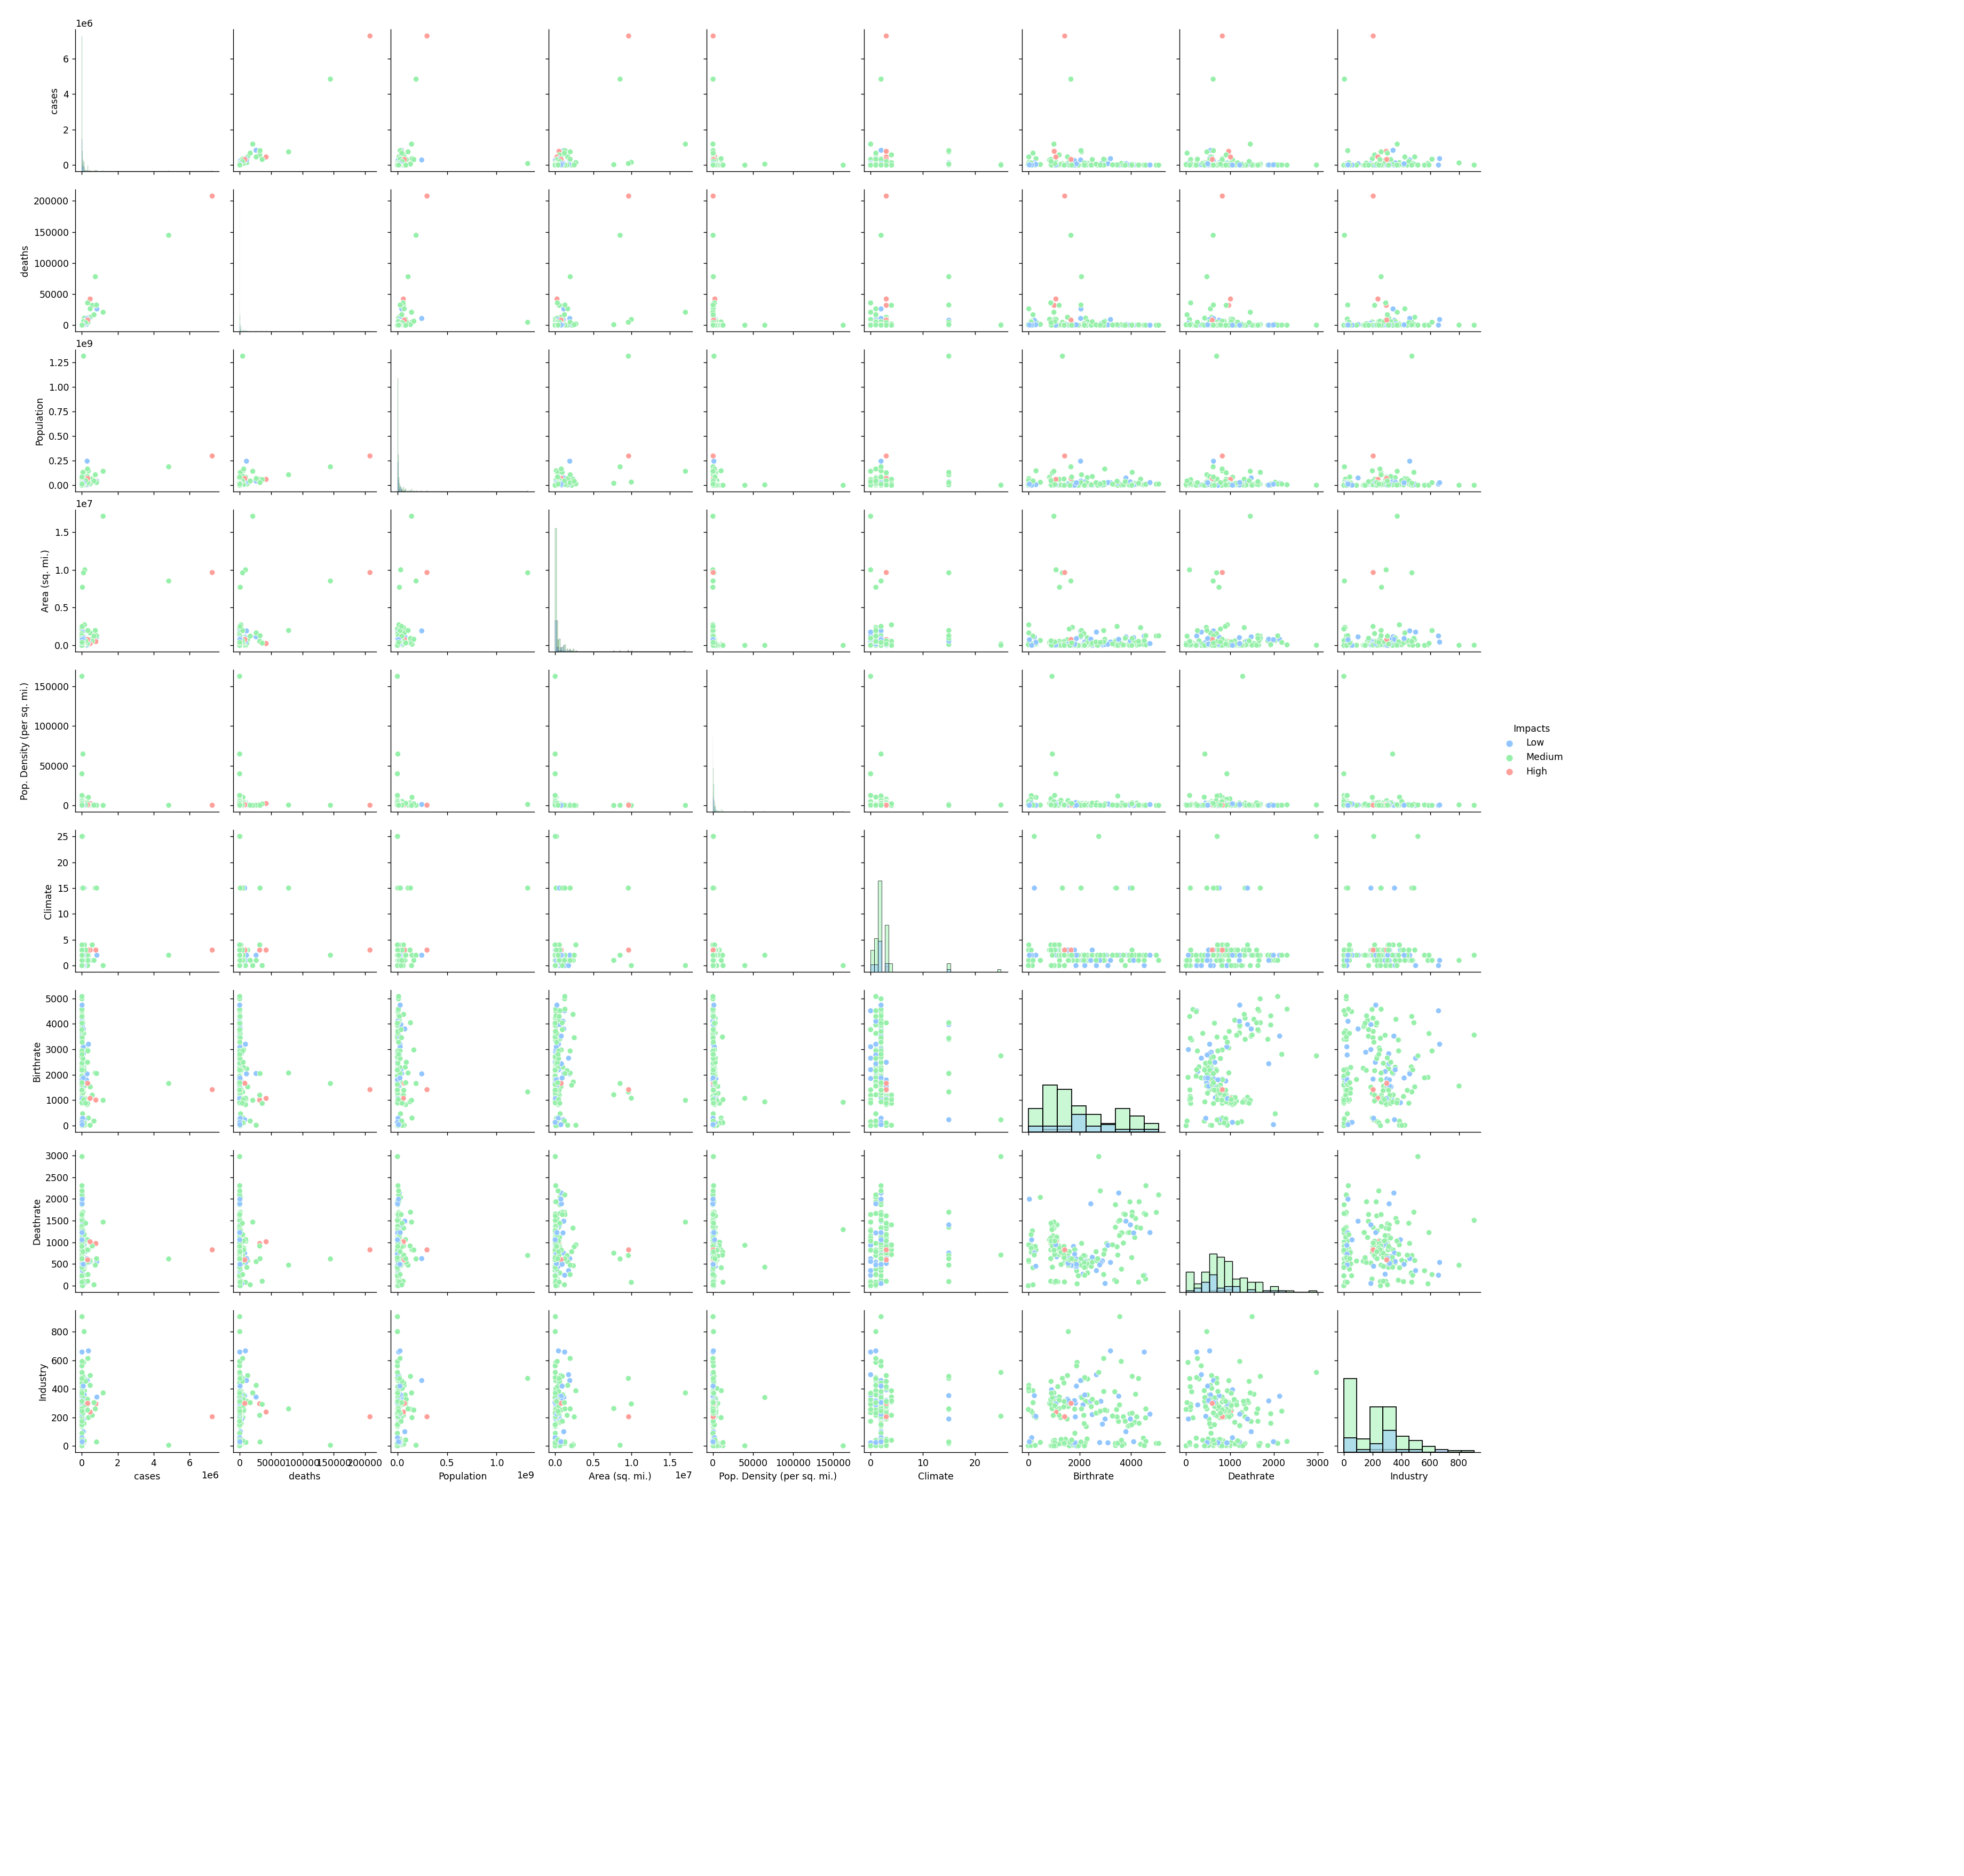

In [33]:
# Pairplot
sns.pairplot(df3_with_impacts, vars = ['cases', 'deaths','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Climate','Birthrate' ,'Deathrate','Industry'],
                                hue= 'Impacts', diag_kind="hist")

<span style="color:#000080;"> The pair plot from above is an extension to the previous obtained pairplot. In this, it features the impacts in different colors therefore we could observe the aftermath of lockdown. The graph shows that the Pop. Density, Birthrates, Industry do have some major role in the Lockdown impacts </span> 

## Australian International Travel Impacts

The tourism industry for Australia was impacted because of travel restrictions and lockdowns.

In [34]:
ArrDepdf.head() #Arrival departure dataframe. It covers first six months of each year from 2017-2020.

Country  2017-Dep  2018-Dep  2019-Dep  2020-Dep  2017-Arr  \
Code                                                                       
AUS          Australia   4360870   4531510   4617190   1599020   4404430   
NZL        New Zealand    879870    874630    893680    393530    900870   
NCL      New Caledonia         0         0         0         0         0   
PNG   Papua New Guinea     19580     18370     19410      8760     18740   
GUM               Guam         0         0         0         0         0   

      2018-Arr  2019-Arr  2020-Arr Continent  
Code                                          
AUS    4591970   4735110   2342270   Oceania  
NZL     898640    920820    399580   Oceania  
NCL          0         0         0   Oceania  
PNG      17840     19370      8260   Oceania  
GUM          0         0         0   Oceania

## Arrival-Departure trends

In [ ]:
# Data Preparation of COVID analysis with tourism
fig, axes = plt.subplots(2, 4, figsize = (10, 6))
ArrDepdf = ArrDepdf[1:171]
ArrDepdf["2017-Deplog"] = np.log(ArrDepdf["2017-Dep"]) #Log transformations to scale down high contrasting values.
ArrDepdf["2018-Deplog"] = np.log(ArrDepdf["2018-Dep"])
ArrDepdf["2019-Deplog"] = np.log(ArrDepdf["2019-Dep"])
ArrDepdf["2020-Deplog"] = np.log(ArrDepdf["2020-Dep"])
ArrDepdf["2017-Arrlog"] = np.log(ArrDepdf["2017-Arr"])
ArrDepdf["2018-Arrlog"] = np.log(ArrDepdf["2018-Arr"])
ArrDepdf["2019-Arrlog"] = np.log(ArrDepdf["2019-Arr"])
ArrDepdf["2020-Arrlog"] = np.log(ArrDepdf["2020-Arr"])
sns.scatterplot("2017-Dep", "2017-Arr", hue = "Continent", data = ArrDepdf, ax = axes[0][0], legend = True)  #Scatterplots for first six months of three years.
sns.scatterplot("2018-Dep", "2018-Arr", hue = "Continent", data = ArrDepdf, ax = axes[0][1], legend = False)
sns.scatterplot("2019-Dep", "2019-Arr", hue = "Continent", data = ArrDepdf, ax = axes[0][2], legend = False)
sns.scatterplot("2020-Dep", "2020-Arr", hue = "Continent", data = ArrDepdf, ax = axes[0][3], legend = False)
sns.scatterplot("2017-Deplog", "2017-Arrlog", hue = "Continent", data = ArrDepdf, ax = axes[1][0], legend = False)
sns.scatterplot("2018-Deplog", "2018-Arrlog", hue = "Continent", data = ArrDepdf, ax = axes[1][1], legend = False)
sns.scatterplot("2019-Deplog", "2019-Arrlog", hue = "Continent", data = ArrDepdf, ax = axes[1][2], legend = False)
sns.scatterplot("2020-Deplog", "2020-Arrlog", hue = "Continent", data = ArrDepdf, ax = axes[1][3], legend = False)
plt.show()

<span style="color:#000080;"> As can be seen, International travel in Australia was greatly decreased in the first six months of 2020. More people arrived than left due to the travel restrictions. We will uncover more trends pertaining to regions.

## Region Wise Distributions

In [ ]:
ArrDepdf["Arr/Dep-17"] = ArrDepdf["2017-Dep"]/ArrDepdf["2017-Arr"] # reducing dimensionality by dividing Arrival/Departure.
ArrDepdf["Arr/Dep-18"] = ArrDepdf["2018-Dep"]/ArrDepdf["2018-Arr"]
ArrDepdf["Arr/Dep-19"] = ArrDepdf["2019-Dep"]/ArrDepdf["2019-Arr"]
ArrDepdf["Arr/Dep-20"] = ArrDepdf["2020-Dep"]/ArrDepdf["2020-Arr"]
ArrDepdf["Arr/Dep-17"]= ArrDepdf["Arr/Dep-17"].replace([np.inf, -np.inf], np.nan)
ArrDepdf["Arr/Dep-18"]= ArrDepdf["Arr/Dep-18"].replace([np.inf, -np.inf], np.nan) 
ArrDepdf["Arr/Dep-19"] = ArrDepdf["Arr/Dep-19"].replace([np.inf, -np.inf], np.nan) 
ArrDepdf["Arr/Dep-20"] = ArrDepdf["Arr/Dep-20"].replace([np.inf, -np.inf], np.nan) #removing NAN and inf values.
ArrDepdf["Arr/Dep-17"].dropna(inplace = True)
ArrDepdf["Arr/Dep-18"].dropna(inplace = True)
ArrDepdf["Arr/Dep-19"].dropna(inplace = True)
ArrDepdf["Arr/Dep-20"].dropna(inplace = True)
fig, axes = plt.subplots(1, 4, figsize = (15, 4)) 
sns.histplot(data=ArrDepdf, x="Arr/Dep-17", hue = "Continent", ax = axes[0], kde = True)
sns.histplot(data=ArrDepdf, x="Arr/Dep-18", hue = "Continent",ax = axes[1], kde = True)
sns.histplot(data=ArrDepdf, x="Arr/Dep-19", hue = "Continent",ax = axes[2], kde = True)
sns.histplot(data=ArrDepdf, x="Arr/Dep-20", hue = "Continent",ax = axes[3], kde = True)

<span style="color:#000080;"> This histogram indicates the Arrival-Departure ratio for three years. The Arr/Dep ratio has a greater variance for 2020 as compared to the previous years. More European travellers were likely to stay in Australia than leave. This could be due to travel restrictions from back home. African travellers were likely to leave Australia due to relaxed travel restrictions. African states reported lesser spread of cases in the first 6 months.

## Adding More Factors

In [ ]:
df3_1 = pd.merge(df3, ArrDepdf)
df3_1.dropna(inplace= True)
px.scatter(df3_1, "Arr/Dep-20","GDP ($ per capita)", size = "cases", color="Region",
                 hover_name="Country", log_x=True, size_max=60)

<span style="color:#000080;"> This graph highlights 4 different variables (GDP, Arrival-Departure Ratio, Region and Case size). Some key takes from this chart are that Travellers from Countries with higher GDP and Case size were likely to stay in Australia than leave. In contrast, people from countries with lower GDP and lower case sizes were likelier to leave Australia. Some outliers are countries such as India and US.

# Data Analysis

### <span style="color:#000080;"> Data Split </span>

In [20]:
train, test = train_test_split(df3, test_size=0.2, random_state=142)
print(train.shape)
print(test.shape)

(155, 23)
(39, 23)


In [21]:
X_train = train.drop(['Country','Region','Codes','deaths' ], axis = 1)
y_train = train['deaths']
X_test = test.drop(['Country','Region','Codes','deaths'], axis = 1)
y_test = test['deaths']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(155, 19)
(155,)
(39, 19)
(39,)


##  <span style="color: #892528;"> Clustering </span> 

In [22]:
#Dropping non-numeric columns from the original dataframe and creating a new dataframe
df_for_clustering = df3.drop(columns=['Country', 'Region', 'Codes'])
print(df_for_clustering.shape)

(194, 20)


In [23]:
# set up a Kmeans model and train the model with df3 dataset
km= KMeans(n_clusters=4)
km.fit(df_for_clustering)

KMeans(n_clusters=4)

In [24]:
#add the predicted cluster label as one more column into the dataset
df_for_clustering['label']= km.predict(df_for_clustering)
print(df_for_clustering.shape)
df_for_clustering.head()

(194, 21)


cases  deaths  \
Code                  
ABW    3998      27   
AFG   39285    1458   
AGO    4972     183   
AIA       3       0   
ALB   13806     388   

      Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  Population  \
Code                                                                           
ABW                                        48934.248896                71891   
AFG                                         1441.242580             31056997   
AGO                                          194.681596             12127071   
AIA                                           67.240452                13477   
ALB                                         6321.348981              3581655   

      Area (sq. mi.)  Pop. Density (per sq. mi.)  \
Code                                               
ABW              193                        3725   
AFG           647500                         480   
AGO          1246700                          97   
AIA              102                        1321   
ALB            28748                        1246   

      Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
Code                                                                         
ABW                                589.0             28000.0         970.0   
AFG                              16307.0               700.0         360.0   
AGO                              19119.0              1900.0         420.0   
AIA                               2103.0              8600.0         950.0   
ALB                               2152.0              4500.0         865.0   

      Arable (%)  ...  Other (%)  Climate  Birthrate  Deathrate  Agriculture  \
Code              ...                                                          
ABW       1053.0  ...     8947.0      2.0     1103.0      668.0          4.0   
AFG       1213.0  ...     8765.0      1.0      466.0     2034.0         38.0   
AGO        241.0  ...     9735.0      0.0     4511.0      242.0         96.0   
AIA          0.0  ...      100.0      2.0     1417.0      534.0          4.0   
ALB       2109.0  ...     7449.0      3.0     1511.0      522.0        232.0   

      Industry  Service  Percentage Cases  COVIDdeaths_per_Capita  label  
Code                                                                      
ABW      333.0    663.0               1.0                0.037557      3  
AFG       24.0     38.0               1.0                0.004695      3  
AGO      658.0    246.0               1.0                0.001509      3  
AIA       18.0     78.0               1.0                0.000000      3  
ALB      188.0    579.0               1.0                0.010833      3  

[5 rows x 21 columns]

In [25]:
#use groupby to first group the rows in terms of cluster label and then calculate the mean of each column using agg('mean')
df_for_clustering_mean = df_for_clustering.groupby(['label']).agg('mean')
df_for_clustering_mean

cases        deaths  \
label                               
0      2.946735e+05  14409.680000   
1      3.242318e+06  52256.000000   
2      1.802869e+06  49837.000000   
3      3.698382e+04    982.459119   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
label                                                               
0                                            6331.036051            
1                                            3044.854948            
2                                            9918.840357            
3                                            7499.587883            

         Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
label                                                             
0      5.758959e+07    1.385918e+06                 1108.200000   
1      1.204663e+09    6.442275e+06                 2350.500000   
2      1.809201e+08    4.923446e+06                 2373.875000   
3      6.740301e+06    2.939291e+05                 3068.918239   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
label                                                                         
0                             3033.200000        10756.000000    843.880000   
1                             4023.500000         3950.000000    752.000000   
2                             1763.125000        11325.000000    783.375000   
3                             3418.660377        10068.553459    758.578616   

       Arable (%)   Crops (%)    Other (%)    Climate    Birthrate  \
label                                                                
0      1718.32000  281.560000  7119.920000   2.920000  1829.000000   
1       349.00000  199.500000  6310.500000  20.000000  1763.000000   
2      2227.50000  193.875000  7568.625000   3.500000  1793.875000   
3      1111.90566  344.226415  7062.767296   2.566038  2070.050314   

        Deathrate  Agriculture    Industry    Service  Percentage Cases  \
label                                                                     
0      771.520000   130.000000  266.680000  460.28000          1.480000   
1      757.500000   155.500000  374.500000  470.50000         10.000000   
2      974.125000   121.750000  278.875000  548.87500          5.875000   
3      865.616352   100.320755  211.496855  376.27044          1.025157   

       COVIDdeaths_per_Capita  
label                          
0                    0.024665  
1                    0.004735  
2                    0.021897  
3                    0.013481

In [26]:

px.scatter(df_for_clustering['deaths'], df_for_clustering['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], 
            color= df_for_clustering['label'])


<span style="color:#000080;"> Out of many pair of columns, Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 and number of COVID deaths gives better visualisation in separation of cluster than other variables. </span>

##  <span style="color: #892528;"> K- Nearest Neighbors Classifier </span> 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Build a KNN classifier model
clf_knn = KNeighborsClassifier(n_neighbors=1)

# Train the model with the training data
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
# predictions on the test set
y_test_predictions = clf_knn.predict(X_test)
print('Accuracy Score on Test set :', accuracy_score(y_test, y_test_predictions ))

Accuracy Score on Test set : 0.02564102564102564


In [29]:
# finding the best K value
parameter_grid = {'n_neighbors': range(1, 40, 5)}
knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, parameter_grid, scoring = 'accuracy', cv = KFold(n_splits =10, shuffle =True))

gs_knn.fit(X_train, y_train)

print('Best K value is :', gs_knn.best_params_['n_neighbors'])
print('Best Accuracy Score : %.4f\n' % gs_knn.best_score_ )

Best K value is : 31
Best Accuracy Score : 0.0921



In [30]:
# KNN classifier

knn = KNeighborsClassifier(n_neighbors = 26)
knn.fit(X_train, y_train)

scores_KNN = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores_KNN)
print('The accuracy mean is : ', scores_KNN.mean())
print('The standard deviation is : ', scores_KNN.std())

[0.0625     0.0625     0.0625     0.0625     0.125      0.13333333
 0.13333333 0.         0.13333333 0.13333333]
The accuracy mean is :  0.09083333333333332
The standard deviation is :  0.04455801461764951


<span style="color:#000080;"> We choose the best K value to reduce the noise in the model and have a better accuracy score. And the accuracy score, as predicted is quite high (0.0903-0.0256) than the previous value. It is to be noted that it is not as high as the accuracy we got for the Linear regression.
This further proves the fact that KNN is a non-parametric model, where as LR is a parametric model. Especially for our dataset, the logistic regression model is far better than LR and KNN </span>

##  <span style="color: #892528;"> Logistic Regression (Namratta) </span>

### <span style="color:#000080;"> Model Training </span>

In [ ]:
# Instantiating model
model = LogisticRegression()

In [ ]:
# Training Model
model.fit(X_train, y_train)

###  <span style="color:#000080;"> Model Evaluation </span>

In [ ]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [ ]:
print("Accuracy score on Training set : ", accuracy_score(y_train, y_train_hat))
print("Accuracy score on Test set : ", accuracy_score(y_test, y_test_hat))

print("MSE for test: ", mean_squared_error(y_test, y_test_hat))
print("R2 score : ", r2_score(y_test, y_test_hat))

<span style="color:#000080;"> The Logistic Regression model gives the above evaluation metrics. To improve the accuracy score we would use the Feature importance and look at the features that are more important for evaluation. </span>

In [ ]:
estimator = LogisticRegression()
rmse_scores = []
for i in range(1,18):
    selector = RFE(estimator, n_features_to_select = i)
    selector.fit(X_train, y_train)
    y_test_hat = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_hat))
#     print('RMSE on using', i, 'features:', rmse_test)
    rmse_scores.append(rmse_test)

In [ ]:
best = 1
for item in rmse_scores:
    if item < rmse_scores[best - 1]:
        best = rmse_scores.index(item) + 1
plt.figure(figsize = (16,10))
plt.grid()
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on test set')
plt.title('RFE on RMSE scores on test set', fontsize = 18, fontweight = 'bold')
plt.plot(range(1,18), rmse_scores, marker = 'o', color = 'Lightblue', markeredgewidth = 1, markeredgecolor = 'Darkblue')
plt.plot(best , rmse_scores[best-1], marker = 'o', markerfacecolor = 'Lightblue')
plt.show()

###  <span style="color:#000080;"> Feature Importance </span>

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X_train, y_train = make_classification(n_samples=1000, n_features=21, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

##  <span style="color:#000080;"> Logistic Regression after feature importance </span>

In [ ]:
X_train = train.drop(['deaths','Country','Region','Literacy (%)','Crops (%)','Climate','Industry','Codes' ], axis = 1)
y_train = train['deaths']
X_test = test.drop(['deaths','Country','Region','Literacy (%)','Crops (%)','Climate','Industry','Codes'], axis = 1)
y_test = test['deaths']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# Instantiating model
model = LogisticRegression()

In [ ]:
# Training Model
model.fit(X_train, y_train)

In [ ]:
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [ ]:
print("Accuracy score on Training set after RFE : ", accuracy_score(y_train, y_train_hat))
print("Accuracy score on Test set after RFE : ", accuracy_score(y_test, y_test_hat))

print("MSE for test after RFE: ", mean_squared_error(y_test, y_test_hat))
print("R2 score after RFE : ", r2_score(y_test, y_test_hat))

<span style="color:#000080;"> After using the features that are important there is few improvement in the accuracy score. Previously, when we use all the variables, we got the accuracy score of 0.6258 and when we used the variblea from the feature importance, we obtained 0.6387. </span>

## <span style="color:#000080;"> Logistic Regression (Nafis)

In [4]:
params = ['cases','Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Climate','Birthrate' ,'Deathrate','Agriculture','Industry', 'Service' ]
X=df3[params]
y = df3['deaths']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [5]:
predictions = []
for i in range(1, 18):
    estimator = LogisticRegression(solver='liblinear',multi_class='auto',random_state=42)
    selector = RFE(estimator, i)
    selector.fit(X_train,y_train)
    predictions.append(selector.predict(X_test))

In [6]:
predictions = []
for i in range(1, 18):
    estimator = LogisticRegression(solver='liblinear',multi_class='auto',random_state=42)
    selector = RFE(estimator, i)
    selector.fit(X_train,y_train)
    predictions.append(selector.predict(X_test))

In [7]:
accuracy, f1, recall, precision = ([] for i in range(4))
for prediction in predictions:
    accuracy.append(accuracy_score(y_test,prediction))
    f1.append(f1_score(y_test,prediction,average='macro'))
    recall.append(recall_score(y_test,prediction,average='macro'))
    precision.append(precision_score(y_test,prediction,average='macro'))
    
prediction_df = pd.DataFrame({'accuracy': accuracy,'f1': f1,'recall': recall,'precision': precision})

prediction_df.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

<IPython.core.display.Javascript object>


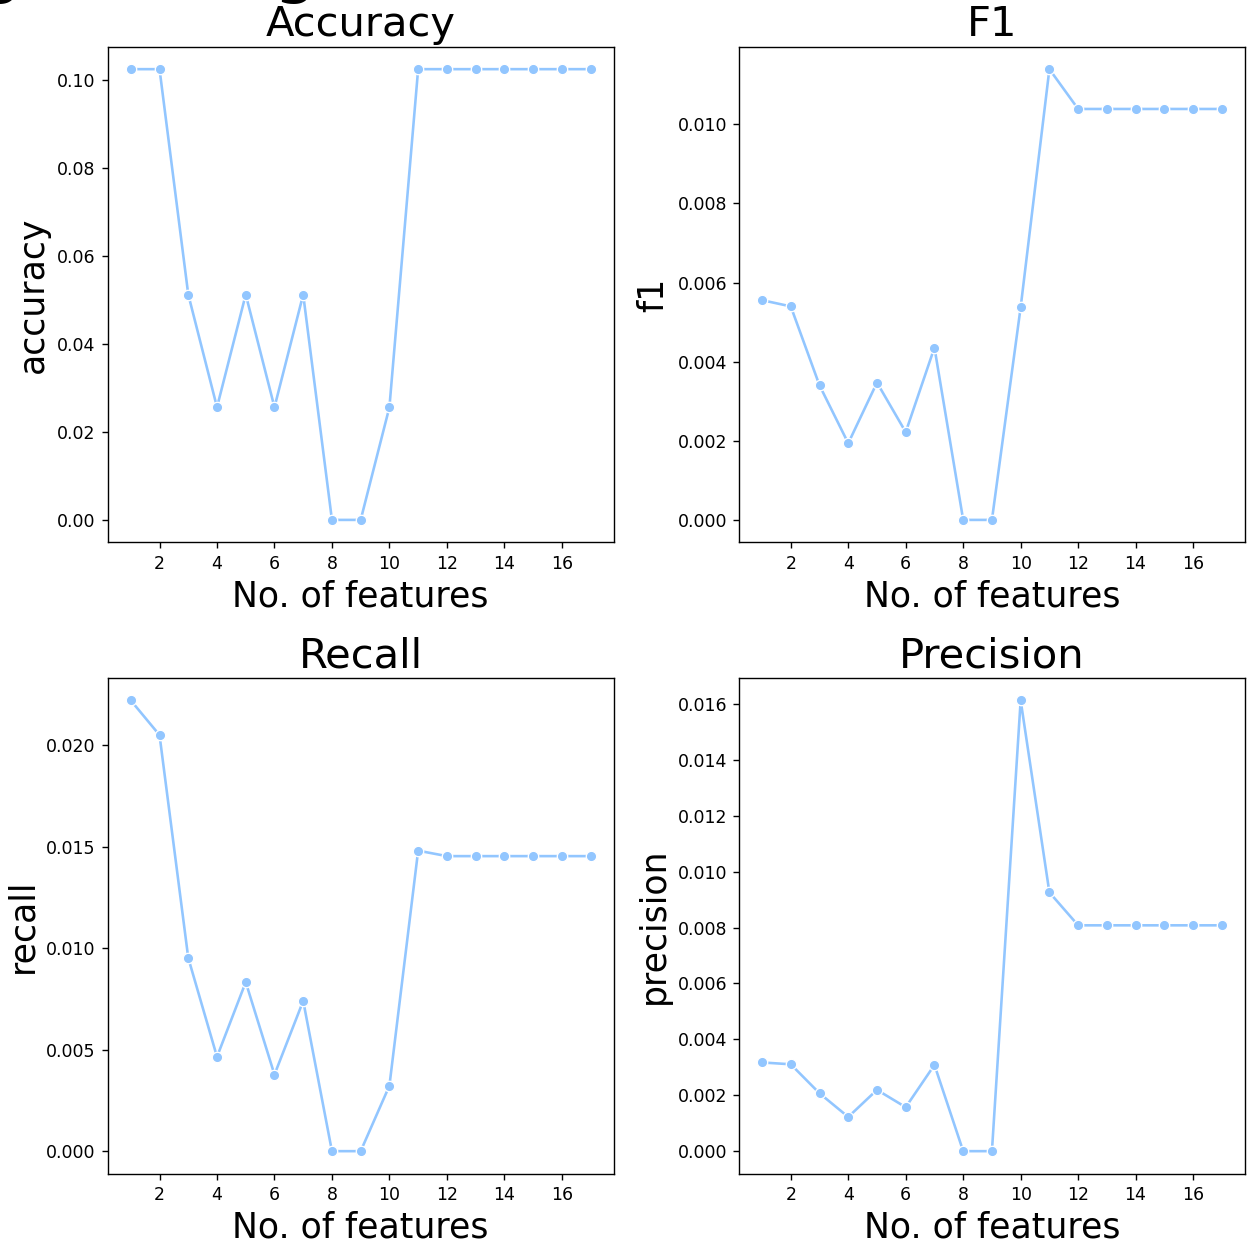

In [8]:
cols = ['accuracy','f1','recall','precision']
titleList = ['Accuracy','F1','Recall','Precision']

fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (10,10),constrained_layout = True)
#plt.tight_layout()
fig.suptitle('Logistic Regression Performance with RFE', size='40',y=1.05)
for i, ax in enumerate(axes.flat):
    sns.lineplot(data=prediction_df,x=prediction_df.index,y=cols[i],ax=ax,marker="o")
    ax.set_title(titleList[i],size='24')
    ax.set_xlabel('No. of features',size='20')
    ax.set_ylabel(cols[i],size='20')

##  <span style="color: #892528;"> Linear Regression </span>

<span style="color:#000080;"> For our linear regression modeling we used Linear Regression paired with Recursive Feature Elimination (RFE). </span>

In [ ]:
predictions = []
for i in range(1, 18):
    estimator = linear_model.LinearRegression()
    selector = RFE(estimator, i)
    selector.fit(X_train,y_train)
    predictions.append(selector.predict(X_test))

In [ ]:
mse, rmse, rsquared, mae = ([] for i in range(4))
for prediction in predictions:
    mse.append(mean_squared_error(y_test, prediction))
    rmse.append(np.sqrt(mean_squared_error(y_test, prediction)))
    rsquared.append(r2_score(y_test, prediction))
    mae.append(mean_absolute_error(y_test, prediction))
prediction_df = pd.DataFrame({'mse': mse, 'rmse': rmse, 'rsquared': rsquared, 'mae': mae})
prediction_df.index = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [ ]:
prediction_df

In [ ]:
cols = ['mse','rmse','rsquared','mae']
titleList = ['Mean Squared Error','Root Mean Squared Error','R Squared','Mean Absolute Error']

fig,axes = plt.subplots(2, 2, sharex=False, sharey=False,figsize = (10,10),constrained_layout = True)
#plt.tight_layout()
fig.suptitle('Linear Regression Performance with RFE', size='40',y=1.05)
for i, ax in enumerate(axes.flat):
    sns.lineplot(data=prediction_df,x=prediction_df.index,y=cols[i],ax=ax,marker="o")
    ax.set_title(titleList[i],size='10')
    ax.set_xlabel('No. of features',size='15')
    ax.set_ylabel(cols[i],size='15')

<span style="color:#000080;"> As it can be observed from the graphs, the mse and rmse were really high. The general trend was that there was a very noticeable drop in mse and rmse due to one feature as can be seen by the relatively steel gradient fall between features 9 and 10, other than that the mse and rmse values remained rather consistently stable with the addition of more features. For the all important r squared values, addition of the first two features increases the r squared values very slightly and then almost flats out with the exception of feature 10 which causes the r squared value to increase really sharply followed by similarly leveling off as previously observed with mse and rmse values. The trend for mae values is only slightly different as addition of features upto feature 10 increases the mae values minimally followed by a sharp plummet. Also the graphs go horizontal because I wanted to make the trends to be really visibly when compared to horizontal lines, since our graph has a few features that only make small contributions to accurately predicting number of deaths leading to very small gradient changes, it becomes hard to notice them. Thus I added extra empty features till after our 11 features to make the small contributions more highlightable </span>

# Conclusion

In this project, we have explored global COVID trends, case distributions, and their impact on Australian international travel. We have also used important country data such as GDP, and Population to perform clustering and predictive modelling. This has helped us to see some important factors that might be affecting COVID-19 spread.
